# Reconocimiento facial

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [3]:
faces = fetch_lfw_people(min_faces_per_person=50)

In [4]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [5]:
print(faces.images.shape)

(1560, 62, 47)


**Tenemos 1560 imágenes, con 62 pixeles de altura y 47 de anchura**

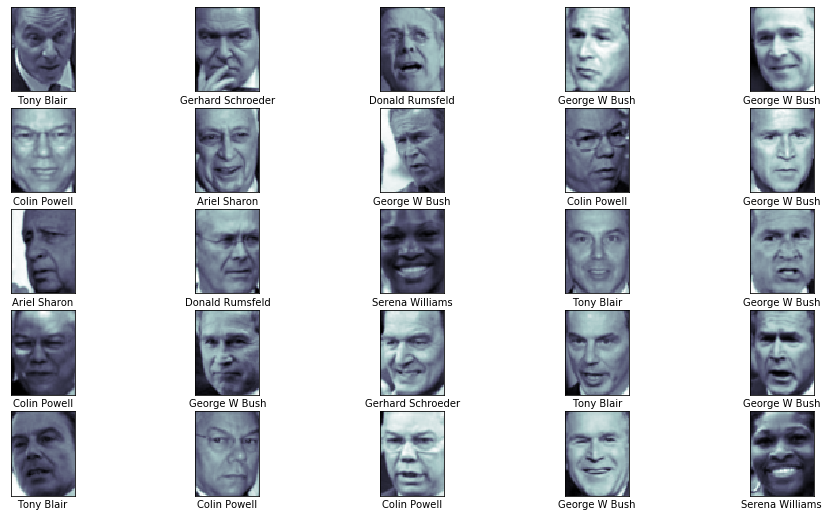

In [9]:
fix, ax = plt.subplots(5,5,figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

**Aquí tenemos 62*47=2914 pixeles por imagenes, si usamos un SVM son 2915 dimensiones, lo cual es muy grande, por lo que utilizaremos solo las carácteristicas más importantes de cada imagen.**

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [14]:
#principal component analisis pca
pca = RandomizedPCA(n_components=150,whiten=50,random_state=42) 
##ncomponents es el numero de componenetes que quiero usar en vez de las 2914

svc= SVC(kernel="rbf",class_weight="balanced")
model = make_pipeline(pca,svc)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state= 42)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    "svc__C": [0.1,1,5,10,50],
    "svc__gamma": [0.0001,0.0005,0.001,0.005,0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(xtrain,ytrain)

CPU times: user 2min 34s, sys: 649 ms, total: 2min 35s
Wall time: 1min 42s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=50)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            rando

In [21]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [23]:
classifier = grid.best_estimator_
yfit = classifier.predict(xtest)
yfit.shape  ## tenemos 390 caras reconocidas, no las podemos desplegar todas por pantalla.

(390,)

Text(0.5, 0.98, 'predicciones de las imagenes (incorrectas en rojo)')

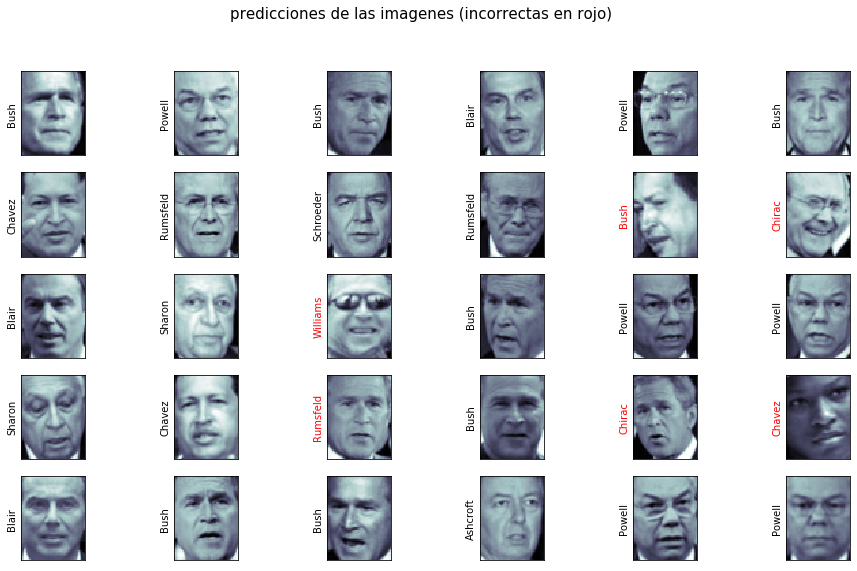

In [25]:
##solo mostratemos algunas de las predicciones.

fig, ax = plt.subplots(5,6, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
            color ="black" if yfit[i] == ytest[i] else "red")
fig.suptitle("predicciones de las imagenes (incorrectas en rojo)", size=15)


In [26]:
from sklearn.metrics import classification_report


In [27]:
print(classification_report(ytest,yfit,target_names=faces.target_names)) 

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.75      0.73        16
     Colin Powell       0.85      0.92      0.88        66
  Donald Rumsfeld       0.58      0.81      0.68        27
    George W Bush       0.95      0.81      0.87       140
Gerhard Schroeder       0.73      0.79      0.76        24
      Hugo Chavez       0.93      0.76      0.84        17
   Jacques Chirac       0.58      0.70      0.64        10
    Jean Chretien       0.73      0.79      0.76        14
    John Ashcroft       0.82      0.88      0.85        16
Junichiro Koizumi       0.89      0.73      0.80        11
  Serena Williams       0.70      0.78      0.74         9
       Tony Blair       0.83      0.85      0.84        40

         accuracy                           0.82       390
        macro avg       0.77      0.80      0.78       390
     weighted avg       0.84      0.82      0.83       390



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
mat = confusion_matrix(ytest, yfit)

In [30]:
import seaborn as sns; sns.set()

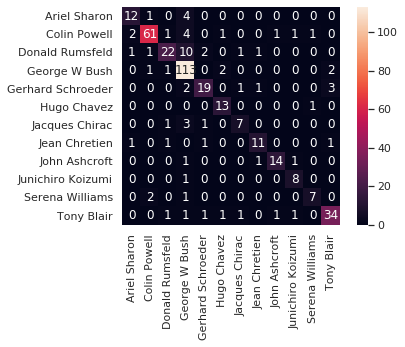

In [32]:
### matriz de confusión

sns.heatmap(mat.T,square=True, annot=True, fmt="d", cbar=True, 
           xticklabels=faces.target_names, yticklabels=faces.target_names)